<a href="https://colab.research.google.com/github/oimartin/460/blob/main/hw1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 397 kB/s 


In [2]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Question 2

## Problem

Inspired by Hakeem-Ur-Rehman: https://github.com/oimartin/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb

\begin{align}
Max \hspace{1cm} Z & = -4x_1 + 2x_2 \\
Subject\hspace{0.5cm}to \\
\hspace{0.5cm} -2x_1+2x_2 & \leq 7 \\
\hspace{0.5cm} x_1 & \geq 2 \\
\hspace{0.5cm} x_1 - 4x_2 & \leq 0 \\
\hspace{0.5cm} 2x_1 + 2x_2 & \geq 10 \\
x_1, x_2 & \geq 0 \\
\end{align}

## Code

In [ ]:
# Create an object of a model
prob = LpProblem("Question_2_LP", LpMaximize)

In [ ]:
# Define the decision variables
x1 = LpVariable("x1",0)
x2 = LpVariable("x2", 0)

In [ ]:
# Define the objective function
prob += -4*x1 + 2*x2

In [ ]:
# Define the constraints
prob += -2*x1 + 2*x2 <= 7.0, "1st constraint"
prob += x1>= 2.0, "2nd constraint"
prob += x1 - 4*x2 <= 0.0, "3rd constraint"
prob += 2*x1 + 2*x2 >= 10.0, "4th constraint"
prob += x1 >= 0.0, "5th constraint"
prob += x2 >= 0.0, "6th constraint"

In [ ]:
# Solve the linear programming problem
prob.solve()

1

In [ ]:
# Print the results
print(f"Status: {LpStatus[prob.status]}")

Status: Optimal


In [ ]:
[print(v.name, "=", v.varValue) for v in prob.variables()]

x1 = 2.0
x2 = 5.5


[None, None]

In [ ]:
print(f'''The optimal value of the objective function is = {value(prob.objective)}''')

The optimal value of the objective function is = 3.0


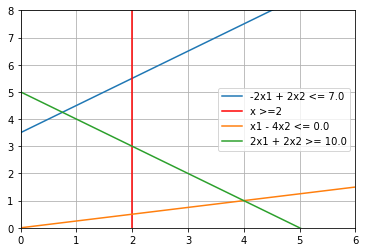

In [ ]:
# Plot the optimal solution
x = np.arange(0,10)
plt.plot(x, 3.5 + x, label = '-2x1 + 2x2 <= 7.0')
plt.axvline(x=2, label = 'x >=2', color = 'red') 
plt.plot(x, 0.25*x, label = 'x1 - 4x2 <= 0.0')
plt.plot(x, 5 - x, label = '2x1 + 2x2 >= 10.0')

plt.axis([0,6,0,8])
plt.grid(True)
plt.legend()
plt.show()

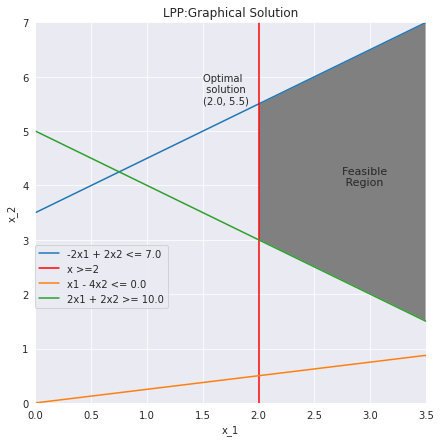

In [ ]:
sns.set_style("darkgrid")

# Plot the optimal solution
plt.figure(figsize=(7,7))
x = np.arange(0,10)
plt.plot(x, 3.5 + x, label = '-2x1 + 2x2 <= 7.0')
plt.axvline(x=2, label = 'x >=2', color='red') 
plt.plot(x, 0.25*x, label = 'x1 - 4x2 <= 0.0')
plt.plot(x, 5 - x, label = '2x1 + 2x2 >= 10.0')


# Define the boundaries of the feasible area in the plot
x = [2, 3.5, 3.5, 2]
y = [5.5, 7, 1.5, 3]
plt.fill(x, y, 'grey')

plt.text(2.75, 4, 'Feasible \n Region', size = '11')
plt.annotate('Optimal \n solution\n(2.0, 5.5)', xy = (1.5, 5.5))

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title('LPP:Graphical Solution')
plt.axis([0, 3.5, 0, 7])
plt.grid(True)
plt.legend(loc = (0, 0.25))
plt.savefig('q2_lpp_graph.png')
plt.show()

# Question 4

In [3]:
# Create an object of a model
prob4 = LpProblem("Question_4_LP", LpMaximize)

In [4]:
# Define the decision variables
x11 = LpVariable("x11",0)
x12 = LpVariable("x12", 0)
x21 = LpVariable("x21", 0)
x22 = LpVariable("x22", 0)
t1 = LpVariable("t1", 0)
t2 = LpVariable("t2", 0)

In [5]:
# Define the objective function
prob4 += 4*(x11+x12)+3*(x21+x22)-(10*t1+8*t2)

In [7]:
# Define the constraints
prob4 += 0.7*(x11 + x12) <= x11, "cutlet 1 70% white meat"
prob4 += 0.6*(x21 + x22) <= x21, "cutlet 2 60% white meat"

prob4 += x11 + x21 <= 5*t1 + 3*t2, "white meat"
prob4 += x12 + x22 <= 2*t1 + 3*t2, "dark meat"

prob4 += x11 + x12 <= 50, "max of cutlet 1 to be sold"
prob4 += x21 + x22 <= 30, "max of cutlet 2 to be sold"

In [8]:
# Solve the linear programming problem
prob4.solve()

1

In [9]:
# Print the results
print(f"Status: {LpStatus[prob4.status]}")

Status: Optimal


In [10]:
[print(v.name, "=", v.varValue) for v in prob4.variables()]

t1 = 8.6666667
t2 = 3.2222222
x11 = 35.0
x12 = 15.0
x21 = 18.0
x22 = 12.0


[None, None, None, None, None, None]

In [11]:
print(f'''The optimal value of the objective function is = {value(prob4.objective)}''')

The optimal value of the objective function is = 177.55555539999997


# Question 5

\begin{align}
Min \hspace{1cm} Z & = 15q_1 + 16q_2 + 17q_3 + 18q_4 + 1.50(e_1 + e_2 + e_4) \\
\hspace{0.5cm} q_1,q_2, q_3,q_4 & \leq 200 \\
\hspace{0.5cm} q_1 & \geq 130 \\
\hspace{0.5cm} q_2 & \geq 160 \\
\hspace{0.5cm} q_3 + e_1 + e_2 & = 250 \\
\hspace{0.5cm} q_4 & \geq 150 \\
\hspace{0.5cm} e_1 + e_2 & = 50 \\
\hspace{0.5cm} e_4 & \leq 60 \\
\hspace{0.5cm} e_1  & = q_1 - 130 \\
\hspace{0.5cm} e_1  & = q_1 - 130 \\
\hspace{0.5cm} e_2  & = q_2 - 160 \\
\hspace{0.5cm} e_4  & = q_4 - 150 \\
\end{align}

In [21]:
# Create an object of a model
prob5 = LpProblem("Question_5_LP", LpMinimize)

# Define the decision variables
q1 = LpVariable("products manufactured in quarter 1",0)
q2 = LpVariable("products manufactured in quarter 2",0)
q3 = LpVariable("products manufactured in quarter 3",0)
q4 = LpVariable("products manufactured in quarter 4",0)
e1 = LpVariable("excess products stored in quarter 1", 0)
e2 = LpVariable("excess products stored in quarter 2", 0)
e4 = LpVariable("excess products stored in quarter 4", 0)

# Define the objective function
prob5 += 15*q1 + 16*q2 + 17*q3 + 18*q4 + 1.50*(e1 + e2 + e4)

# Define the constraints
prob5 += q1 <= 200, "max product1"
prob5 += q2 <= 200, "max product2"
prob5 += q3 <= 200, "max product3"
prob5 += q4 <= 200, "max product4"

prob5 += q1 >= 130, "products to meet demand q1"
prob5 += q2 >= 160, "products to meet demand q2"
prob5 += q3+ e1 + e2 == 250, "products to meet demand quarter 3"
prob5 += q4 >= 150, "products to meet demand q4"

prob5 += e1 + e2 == 50, "excess products combined e1 + e2"
prob5 += e4 <= 60, "excess products q4 less than 60"

prob5 += e1 == q1-130, "excess products q1"
prob5 += e2 == q2-160, "excess products q2"
prob5 += e4 == q4-150, "excess products q4"

In [22]:
# Solve the linear programming problem
prob5.solve()

# Print the results
print(f"Status: {LpStatus[prob5.status]}")

[print(v.name, "=", v.varValue) for v in prob5.variables()]

print(f'''The optimal value of the objective function is = {value(prob5.objective)}''')

Status: Optimal
excess_products_stored_in_quarter_1 = 50.0
excess_products_stored_in_quarter_2 = 0.0
excess_products_stored_in_quarter_4 = 0.0
products_manufactured_in_quarter_1 = 180.0
products_manufactured_in_quarter_2 = 160.0
products_manufactured_in_quarter_3 = 200.0
products_manufactured_in_quarter_4 = 150.0
The optimal value of the objective function is = 11435.0
